# **Healthcare Analytics Project** #  
## Beyond the Books: Mapping Depression in India ##  
### Developed by Fatima Shab - ID: 201800312 ###  
### Objective ##  
To build a predictive model that identifies key factors associated with student depression using demographic, academic, and lifestyle variables, and to assess the relative importance of these factors in predicting depression outcomes.

# **1. Loading the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/tumashab/Documents/AUB MSBA/MSBA 382 - Samar/Individual Project/student_depression_dataset.csv")

# Preview the first few rows
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## **2. Data Cleaning**

In [2]:
# Replace incorrect or unclear city entries
df['City'] = df['City'].replace({
    '3': 'Unknown',
    'Less Delhi': 'Delhi',
    'Less than 5 Kalyan': 'Kalyan'
})


In [3]:
# Check number of rows before filtering
print("Number of rows before filtering:", df.shape[0])


Number of rows before filtering: 27901


In [4]:
# Keep only rows where Profession is 'Student'
df = df[df['Profession'].str.strip().str.lower() == 'student']


In [5]:
# Check number of rows after filtering
print("Number of rows before filtering:", df.shape[0])

Number of rows before filtering: 27870


In [6]:
# Keep only rows where Work Pressure is 0
df = df[df['Work Pressure'] == 0]


In [7]:
# Check number of rows after filtering
print("Number of rows before filtering:", df.shape[0])

Number of rows before filtering: 27867


In [8]:
# Drop the Work Pressure column
df = df.drop(columns=['Work Pressure'])


In [9]:
# Replace 0 values with 5 and convert to float
df['CGPA'] = df['CGPA'].replace(0, 5).astype(float)


In [10]:
# Drop the Job Satisfaction column
df = df.drop(columns=['Job Satisfaction'])


In [11]:
import numpy as np

# Map sleep duration categories to numeric values
sleep_mapping = {
    "'Less than 5 hours'": 4.5,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9.0,
    "'Others'": np.nan
}

# Create the new column
df['Sleep_Hours'] = df['Sleep Duration'].map(sleep_mapping)


In [12]:
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']

["'5-6 hours''Less than 5 hours''7-8 hours''More than 8 hours'Others"]

In [13]:
# Map Degree to Degree_Level
df['Degree_Level'] = df['Degree'].apply(lambda x: 'Highschool' if x == 'Class 12' 
                                        else ('University' if x != 'Others' else 'Others'))


In [14]:
# Remove rows where Financial Stress is '?'
df = df[df['Financial Stress'] != '?']


In [15]:
# Check number of rows after filtering
print("Number of rows before filtering:", df.shape[0])

Number of rows before filtering: 27864


In [16]:
# Value counts
label_counts = df['Depression'].value_counts()

# Percentage distribution
label_percentages = df['Depression'].value_counts(normalize=True) * 100

# Combine into a single DataFrame for clarity
distribution_df = pd.DataFrame({
    'Count': label_counts,
    'Percentage (%)': label_percentages.round(2)
})

print(distribution_df)


            Count  Percentage (%)
Depression                       
1           16306           58.52
0           11558           41.48


In [17]:
# Check data types of all columns
print(df.dtypes)


id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
Sleep_Hours                              float64
Degree_Level                              object
dtype: object


In [18]:
# Rename the column
df = df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'Suicidal thoughts'
})

# Convert Financial Stress to float
df['Financial Stress'] = df['Financial Stress'].astype(float)


In [19]:
# Check data types of all columns
print(df.dtypes)

id                                    int64
Gender                               object
Age                                 float64
City                                 object
Profession                           object
Academic Pressure                   float64
CGPA                                float64
Study Satisfaction                  float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal thoughts                    object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
Depression                            int64
Sleep_Hours                         float64
Degree_Level                         object
dtype: object


## **3. Exploratorty Data Analysis**

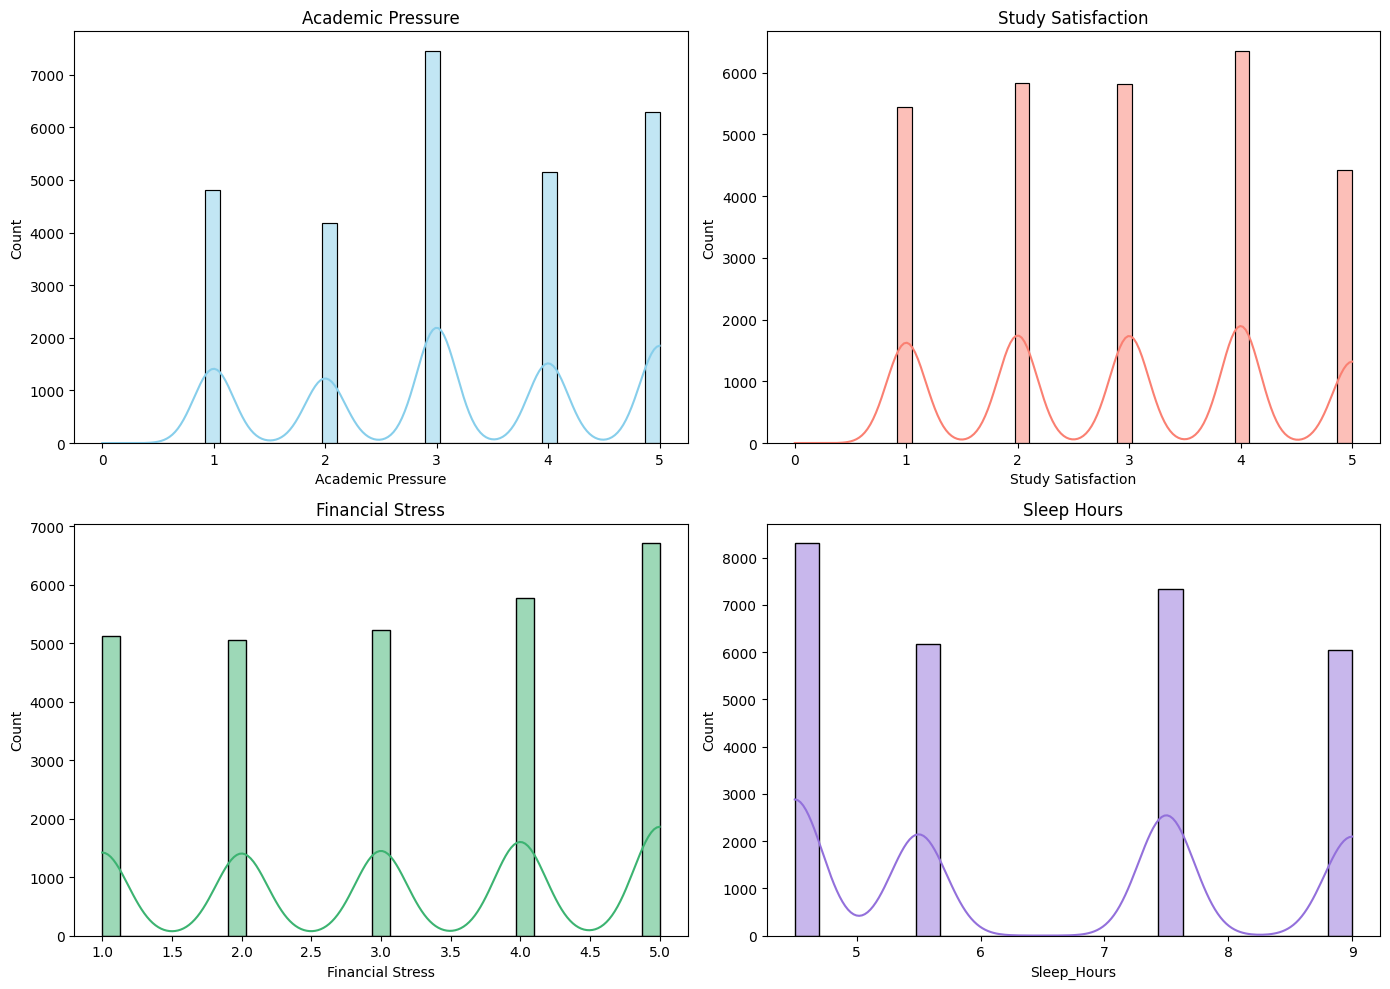

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot each distribution
sns.histplot(df['Academic Pressure'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Academic Pressure')

sns.histplot(df['Study Satisfaction'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Study Satisfaction')

sns.histplot(df['Financial Stress'], kde=True, ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Financial Stress')

sns.histplot(df['Sleep_Hours'], kde=True, ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Sleep Hours')

# Layout adjustment
plt.tight_layout()
plt.show()


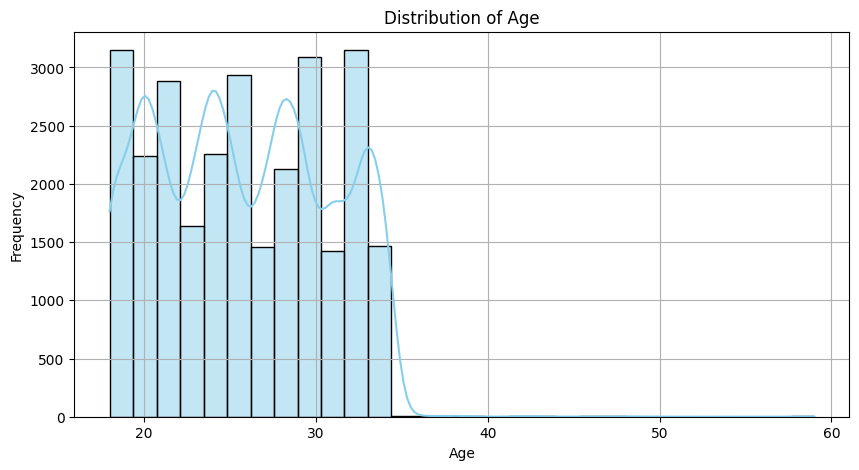

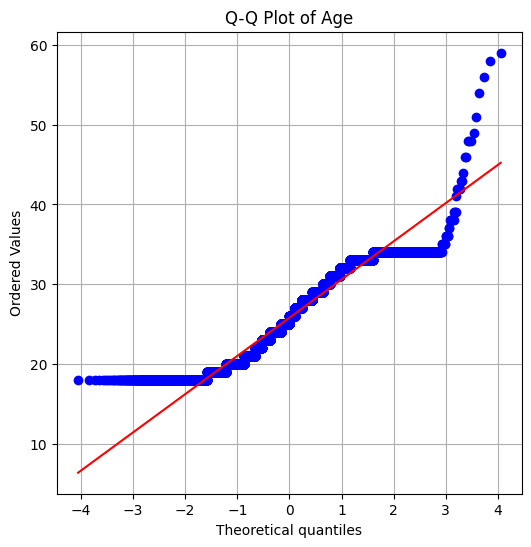

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.grid(True)
plt.show()


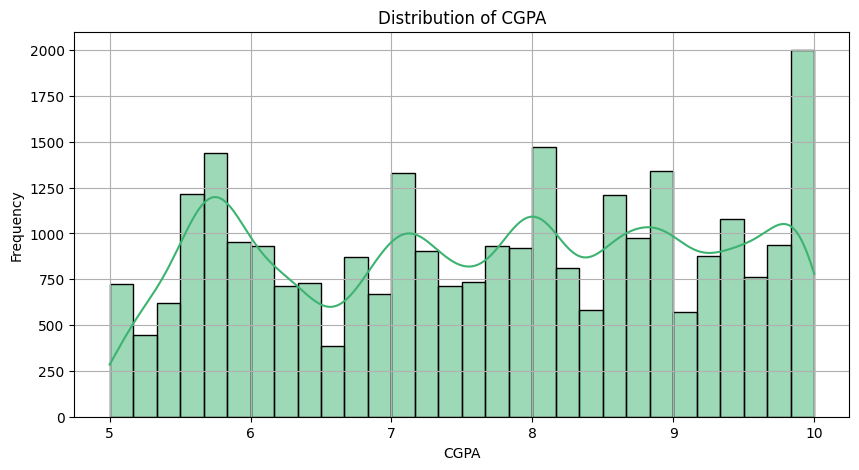

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot CGPA distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['CGPA'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## **4. Splitting the data**

In [23]:
from sklearn.model_selection import train_test_split

# Step 1: Split into training and temporary sets (70% train, 30% temp)
train_df, temp_df = train_test_split(
    df, 
    test_size=0.30, 
    random_state=42, 
    stratify=df['Depression']
)

# Step 2: Split the temporary set equally into validation and test (15% each)
valid_df, test_df = train_test_split(
    temp_df, 
    test_size=0.50, 
    random_state=42, 
    stratify=temp_df['Depression']
)

# Step 3: Separate features and target
X_train = train_df.drop(columns=['Depression'])
y_train = train_df['Depression']

X_valid = valid_df.drop(columns=['Depression'])
y_valid = valid_df['Depression']

X_test = test_df.drop(columns=['Depression'])
y_test = test_df['Depression']

# Optional: Check sizes
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (19504, 17) (19504,)
Validation set: (4180, 17) (4180,)
Test set: (4180, 17) (4180,)


## **5. Building the ML Pipeline**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# === Feature groups ===

# 1. One-hot encoding
one_hot_features = [
    'Gender',
    'Dietary Habits',
    'Suicidal thoughts',
    'Degree_Level',
    'Family History of Mental Illness'
]

# 2. MinMax scaling
minmax_features = [
    'Age',
    'CGPA'
]

# 3. Pass-through (ordinal features)
passthrough_features = [
    'Academic Pressure',
    'Study Satisfaction',
    'Financial Stress'
]

# 4. Sleep Hours: impute with mode (of training), then scale
sleep_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
])

# === ColumnTransformer ===

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_features),
        ('minmax', MinMaxScaler(), minmax_features),
        ('passthrough', 'passthrough', passthrough_features),
        ('sleep', sleep_pipeline, ['Sleep_Hours'])
    ]
)


## **6. Fitting the model and predicting**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# 1. Build full pipeline: preprocessing + model
full_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# 2. Fit on training data
full_pipeline.fit(X_train, y_train)

# 3. Predict on validation set
y_pred = full_pipeline.predict(X_valid)

# 4. Evaluate
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1734
           1       0.85      0.87      0.86      2446

    accuracy                           0.83      4180
   macro avg       0.83      0.82      0.83      4180
weighted avg       0.83      0.83      0.83      4180

Confusion Matrix:
 [[1352  382]
 [ 324 2122]]


## **7. Error Analysis**

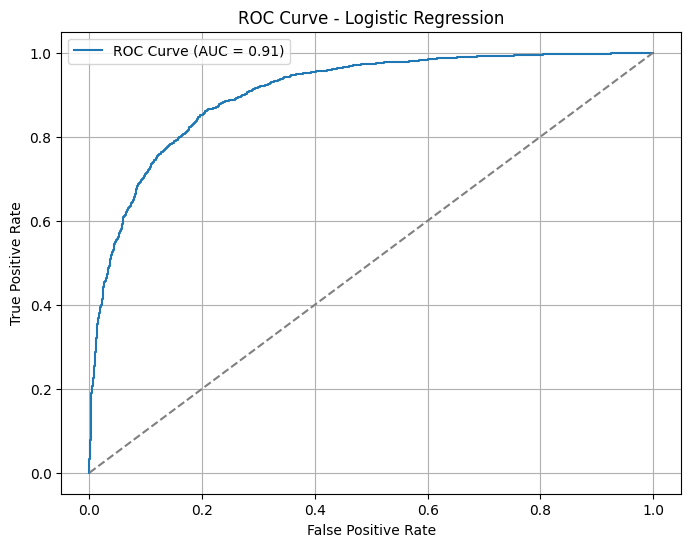

Precision: 0.847444089456869
Recall: 0.8675388389206868
AUC Score: 0.9054179268744678


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt

# 1. Predict probabilities for ROC
y_prob = full_pipeline.predict_proba(X_valid)[:, 1]

# 2. Calculate ROC components
fpr, tpr, thresholds = roc_curve(y_valid, y_prob)
auc_score = roc_auc_score(y_valid, y_prob)

# 3. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# 4. Print Precision & Recall at default threshold (0.5)
y_pred = full_pipeline.predict(X_valid)
print("Precision:", precision_score(y_valid, y_pred))
print("Recall:", recall_score(y_valid, y_pred))
print("AUC Score:", auc_score)



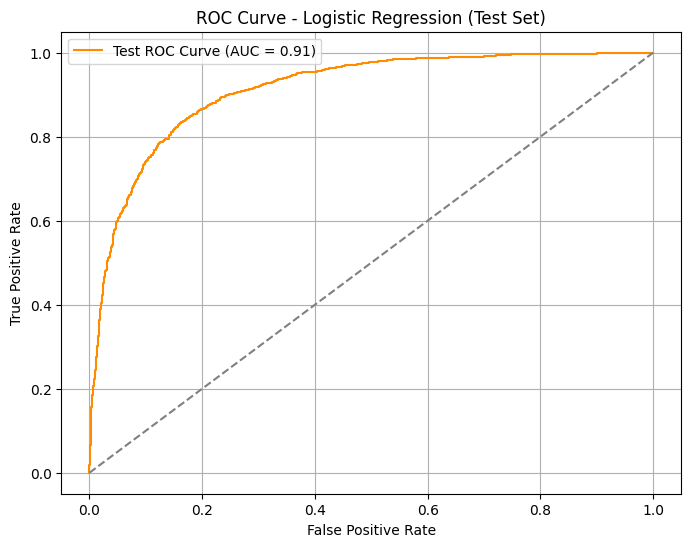

Precision (Test): 0.8535514764565044
Recall (Test): 0.8744889615699101
AUC (Test): 0.9117111853639537


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt

# 1. Predict probabilities on test set
y_test_prob = full_pipeline.predict_proba(X_test)[:, 1]

# 2. Predict labels
y_test_pred = full_pipeline.predict(X_test)

# 3. ROC curve values
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# 4. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f"Test ROC Curve (AUC = {auc_test:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Print metrics
print("Precision (Test):", precision_score(y_test, y_test_pred))
print("Recall (Test):", recall_score(y_test, y_test_pred))
print("AUC (Test):", auc_test)


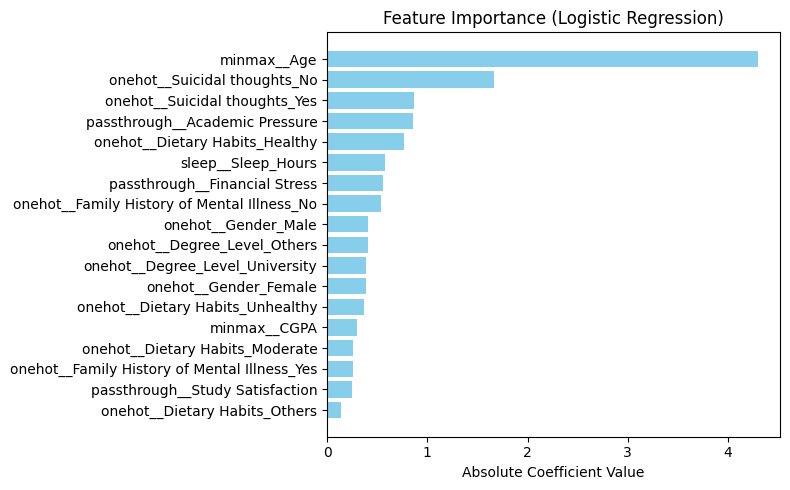

In [35]:
# Get feature names after preprocessing
from sklearn.compose import ColumnTransformer

# This works only if your preprocessor has a get_feature_names_out method
feature_names = full_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Now get the logistic regression model
logreg_model = full_pipeline.named_steps['logreg']

# Get absolute coefficients
importance = np.abs(logreg_model.coef_[0])

# Create DataFrame for plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()




## **9. Preparing a copy to use for the Streamlit Dashboard**

In [28]:
# Create a copy of the original DataFrame
#df_2 = df.copy()


In [29]:
# Check for null values in each column
#print(df_2.isnull().sum())


In [30]:
# Fill NaN in Sleep_Hours with its mode
#sleep_mode = df_2['Sleep_Hours'].mode()[0]
#df_2['Sleep_Hours'] = df_2['Sleep_Hours'].fillna(sleep_mode)


In [31]:
# Check for null values in each column
#print(df_2.isnull().sum())


In [32]:
# Export df_2 to the specified path
##df_2.to_csv("/Users/tumashab/Documents/AUB MSBA/MSBA 382 - Samar/Individual Project/IP_Student_Depression.csv", index=False)
